# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [1]:
import pandas as pd

## imports for Python, Pandas

In [2]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [3]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [4]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [5]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,shortname,state,info.governor
0,Dade,12345,FL,Florida,Rick Scott
1,Broward,40000,FL,Florida,Rick Scott
2,Palm Beach,60000,FL,Florida,Rick Scott
3,Summit,1234,OH,Ohio,John Kasich
4,Cuyahoga,1337,OH,Ohio,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [6]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [7]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [8]:
import pandas as pd
from pandas.io.json import json_normalize
import json
import matplotlib.pylab as plt

In [9]:
#load json file
file = 'data/world_bank_projects.json'
pd_file = pd.read_json(file)

In [10]:
#investigate the headers of pd_file
pd_file.head(5)

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{'Name': 'Regional integration', 'Percent': 46}","[{'name': 'Regional integration', 'code': '47'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,{'$oid': '52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,JB,IBRD,Active,N,"{'Name': 'Participation and civic engagement',...",[{'name': 'Participation and civic engagement'...,"59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,{'$oid': '52b213b38594d8a2be17c784'},2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,"FH,YW,YZ",IBRD,Active,N,{'Name': 'Export development and competitivene...,[{'name': 'Export development and competitiven...,"41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...


In [11]:
#idenfied all the columns in pd_file and choose column to solve problem 1
pd_file.columns

Index(['_id', 'approvalfy', 'board_approval_month', 'boardapprovaldate',
       'borrower', 'closingdate', 'country_namecode', 'countrycode',
       'countryname', 'countryshortname', 'docty', 'envassesmentcategorycode',
       'grantamt', 'ibrdcommamt', 'id', 'idacommamt', 'impagency',
       'lendinginstr', 'lendinginstrtype', 'lendprojectcost',
       'majorsector_percent', 'mjsector_namecode', 'mjtheme',
       'mjtheme_namecode', 'mjthemecode', 'prodline', 'prodlinetext',
       'productlinetype', 'project_abstract', 'project_name', 'projectdocs',
       'projectfinancialtype', 'projectstatusdisplay', 'regionname', 'sector',
       'sector1', 'sector2', 'sector3', 'sector4', 'sector_namecode',
       'sectorcode', 'source', 'status', 'supplementprojectflg', 'theme1',
       'theme_namecode', 'themecode', 'totalamt', 'totalcommamt', 'url'],
      dtype='object')

In [12]:
# investigate whether there are blank cells in column countryname
pd_file[pd_file['countryname'] == '']['countryname']

Series([], Name: countryname, dtype: object)

In [13]:
#testing whether the data column has any null value
pd_file['countryname'].isnull().any()

False

In [14]:
#count the number of times each countryname occurs in the column and sort
count_countryname = pd_file['countryname'].value_counts().sort_values(ascending = False)

In [15]:
#show the top 10 countries with the most world bank's projects
count_countryname.head(10)

Republic of Indonesia              19
People's Republic of China         19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Kingdom of Morocco                 12
Nepal                              12
People's Republic of Bangladesh    12
Republic of Mozambique             11
Africa                             11
Name: countryname, dtype: int64

In [16]:
#investigate the structure in mjtheme_namecode
pd_file['mjtheme_namecode'].head(5)

0    [{'name': 'Human development', 'code': '8'}, {...
1    [{'name': 'Economic management', 'code': '1'},...
2    [{'name': 'Trade and integration', 'code': '5'...
3    [{'name': 'Social dev/gender/inclusion', 'code...
4    [{'name': 'Trade and integration', 'code': '5'...
Name: mjtheme_namecode, dtype: object

In [17]:
#load json as string
str_json = json.load(open(file))

In [18]:
#create a table for mjtheme_namecode
json_table = json_normalize(str_json,'mjtheme_namecode')

In [19]:
#investigate json_table
json_table.head()

,code,name
0,8,Human development
1,11,
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration


In [20]:
#check whether there are blanks in code 
json_table[json_table['code'] =='']['code']

Series([], Name: code, dtype: object)

In [21]:
#checking if there are any null in table
json_table.isnull().any()

code    False
name    False
dtype: bool

In [22]:
#generate a dictionary of unique pairs excluding all blanks
unique_pair= dict()
for i, row in json_table.iterrows():
    if (row['name'] != '') & (row['code'] not in unique_pair):
        unique_pair[str(row['code'])]=str(row['name'])
print(unique_pair)

{'2': 'Public sector governance', '11': 'Environment and natural resources management', '8': 'Human development', '1': 'Economic management', '7': 'Social dev/gender/inclusion', '4': 'Financial and private sector development', '5': 'Trade and integration', '3': 'Rule of law', '9': 'Urban development', '6': 'Social protection and risk management', '10': 'Rural development'}


In [23]:
#replace all the blank space to corresponding name
for i, row in json_table.iterrows():
    if row['name'] == '':
        row['name'] = unique_pair[str(row['code'])]

In [24]:
#solution to question 2
sorted_json_table = json_table['name'].value_counts().sort_values(ascending = False).head(10)
sorted_json_table

Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
Name: name, dtype: int64

In [25]:
#Solution to 3
json_table = json_table.rename(columns = {'name':'Project'})
json_table.head(15)

,code,Project
0,8,Human development
1,11,Environment and natural resources management
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
5,2,Public sector governance
6,11,Environment and natural resources management
7,6,Social protection and risk management
8,7,Social dev/gender/inclusion
9,7,Social dev/gender/inclusion


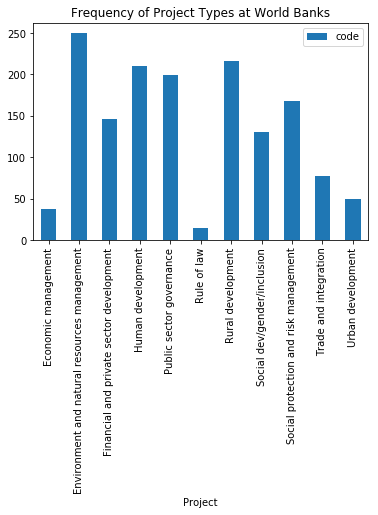

In [31]:
json_table.groupby('Project').count().plot(kind = 'bar', title = 'Frequency of Project Types at World Banks')
plt.show()